In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import pandas as pd
import os
from scipy.signal import argrelextrema
from scipy.signal import gaussian
from scipy.stats import pearsonr
from scipy.stats import binom_test
import seaborn as sns
import itertools as it
from scipy.misc import comb
import fnmatch
import statsmodels.api as sm

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]
def findClosestPoint(values,array):
    values = np.array(values)
    array = np.array(array)
    idx = np.array([np.square(array - value).argmin() for value in values])
    return idx,array[idx]
sns.set_palette("Set2", 8, .75)
def next_permutation(arr):
    '''
    
        Computes the next lexicographical permutation of the specified list in place,
     returning whether a next permutation existed. (Returns False when the argument
     is already the last possible permutation.)
    
    
         Example:
            arr = [0, 1, 0]
            next_permutation(arr)  (returns True)
            arr has been modified to be [1, 0, 0]
    Reference:
    -----------
    Nayuki Minase, 2014. Public domain.
    http://nayuki.eigenstate.org/page/next-lexicographical-permutation-algorithm
            '''
    
    i = len(arr) - 1
    while i > 0 and arr[i - 1] >= arr[i]:
        i -= 1
    if i <= 0:
        return False
    
    # Find successor to pivot
    j = len(arr) - 1
    while arr[j] <= arr[i - 1]:
        j -= 1
    arr[i - 1], arr[j] = arr[j], arr[i - 1]
    
    # Reverse suffix
    arr[i : ] = arr[len(arr) - 1 : i - 1 : -1]
    return True
def number_of_permutations(arr):
    Cnk = [] #keep the combinations!
    s = 0    # sum of repitiotions of elements in arr!
    arrcp = np.array(arr).copy()
    arrcp.sort()
    for item in set(arrcp):
        reps = np.where(arrcp == item)[0].size
        Cnk.append(comb(arrcp.size - s,reps,True))
        s += reps
    return np.prod(np.array(Cnk))

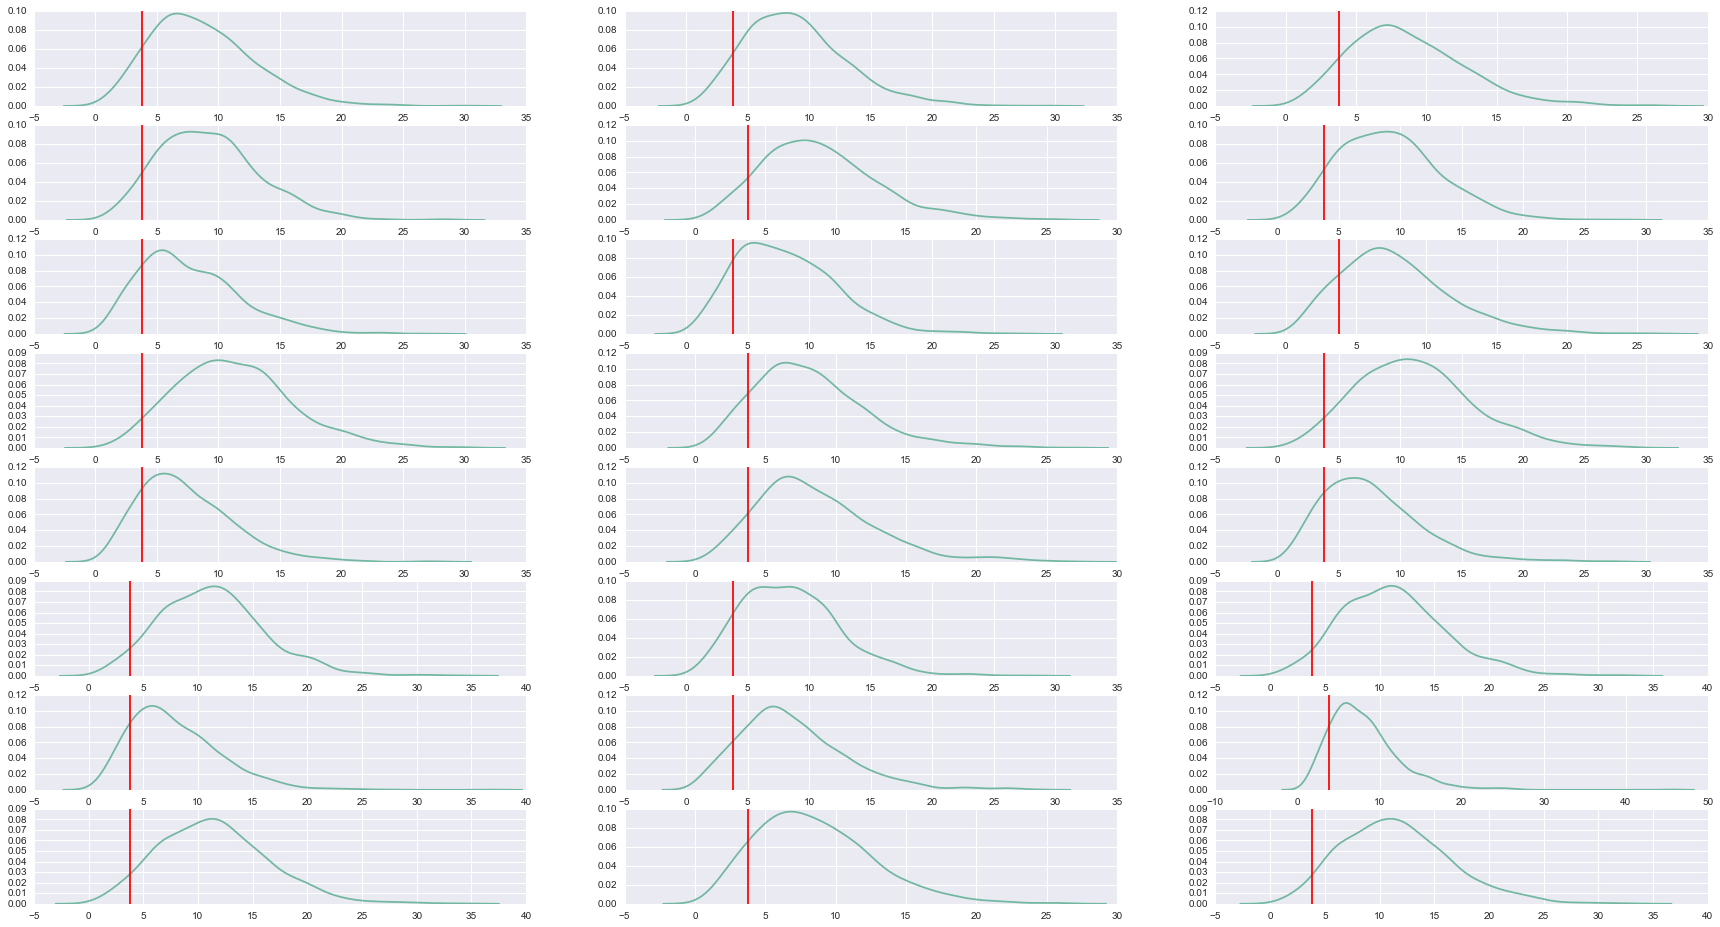

In [4]:
# dataFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/'
NcellsPerDay = [17,11,9,5]
f,axarr = pl.subplots(8,3,figsize = [30,16])
Ct = np.zeros(1000)
totalO = np.zeros(1000)
Cs = np.zeros(1000)
totalS = np.zeros(1000)
pltIdx = 0
for kk,comb in enumerate(it.combinations([1,2,3,4],len(NcellsPerDay))):
    for ii,perm in enumerate(it.permutations(NcellsPerDay)):
        #print np.array(item)
        Cdayt = np.zeros(1000)
        Cdays = np.zeros(1000)
        for jj in range(len(NcellsPerDay)):
            #print kk,ii,jj
            fName = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/subSampling/roRat3906-D'+str(comb[jj])+'-'+str(perm[jj])+'.npArr'
            #print fName
            C41 = pkl.load(open(fName,'rb'))        
            Cdayt  += C41[:,0]
            Cdays  += C41[:,1]
            Ct  += C41[:,0]
            Cs  += C41[:,1]
        try:
            sns.kdeplot(100.0*Cdays/Cdayt,clip=[0,100],ax=axarr[pltIdx/3,np.mod(pltIdx,3)])
        except ZeroDivisionError:
            print (Cdays-Cs).sum()
        axarr[pltIdx/3,np.mod(pltIdx,3)].axvline(3.8,color = 'r')
        pltIdx+=1
R_s = 100.0*Cs/Ct
totalO += Ct
totalS += Cs
dens3906 = sm.nonparametric.KDEUnivariate(R_s)
dens3906.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])

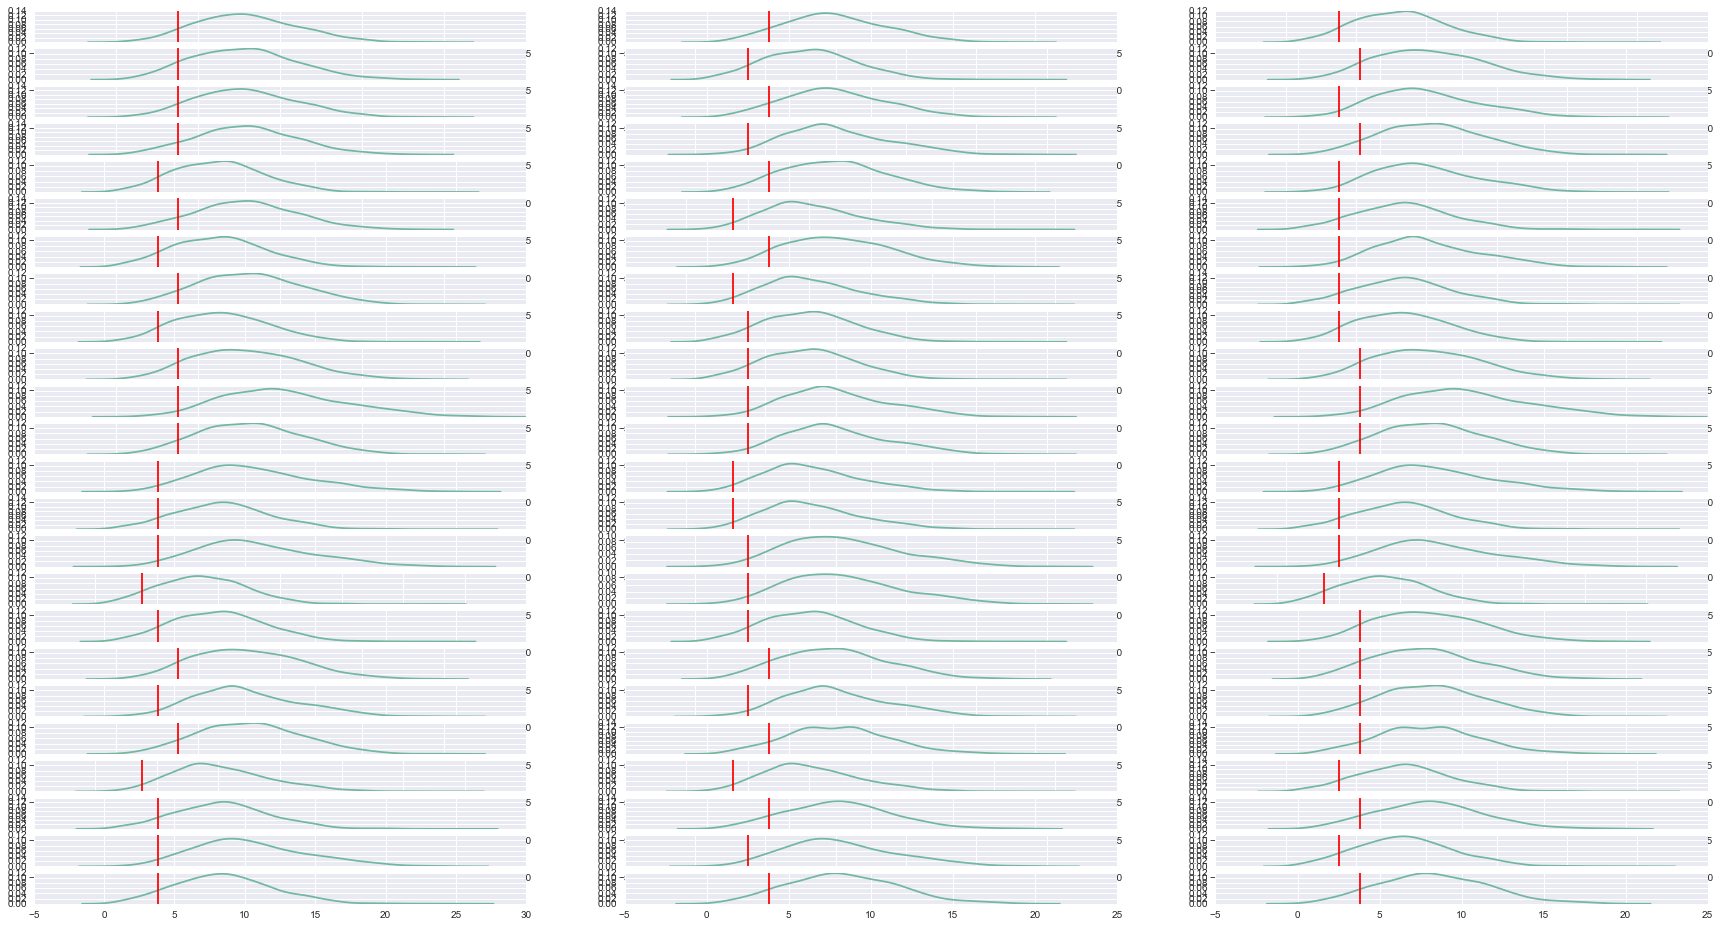

In [5]:
# dataFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/'
NcellsPerDay = [17,11,9,5]
f,axarr = pl.subplots(24,3,figsize = [30,16])
Ct = np.zeros(1000)
Cs = np.zeros(1000)
pltIdx = 0
for kk,comb in enumerate([[1,1,2,3],[1,2,2,3],[1,2,3,3]]):
    for ii,perm in enumerate(it.permutations(NcellsPerDay)):
        #print np.array(item)
        Cdayt = np.zeros(1000)
        Cdays = np.zeros(1000)
        for jj in range(len(NcellsPerDay)):
            #print kk,ii,jj
            fName = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/subSampling/roRat3661-D'+str(comb[jj])+'-'+str(perm[jj])+'.npArr'
            #print fName
            C41 = pkl.load(open(fName,'rb'))        
            Cdayt  += C41[:,0]
            Cdays  += C41[:,1]
            Ct  += C41[:,0]
            Cs  += C41[:,1]
        try:
            sns.kdeplot(100.0*Cdays/Cdayt,clip=[0,100],ax=axarr[pltIdx/3,np.mod(pltIdx,3)])
        except ZeroDivisionError:
            print (Cdays-Cs).sum()
        axarr[pltIdx/3,np.mod(pltIdx,3)].axvline(3.8,color = 'r')
        pltIdx+=1
R_s = 100.0*Cs/Ct
totalO += Ct
totalS += Cs
dens3661 = sm.nonparametric.KDEUnivariate(R_s)
dens3661.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])

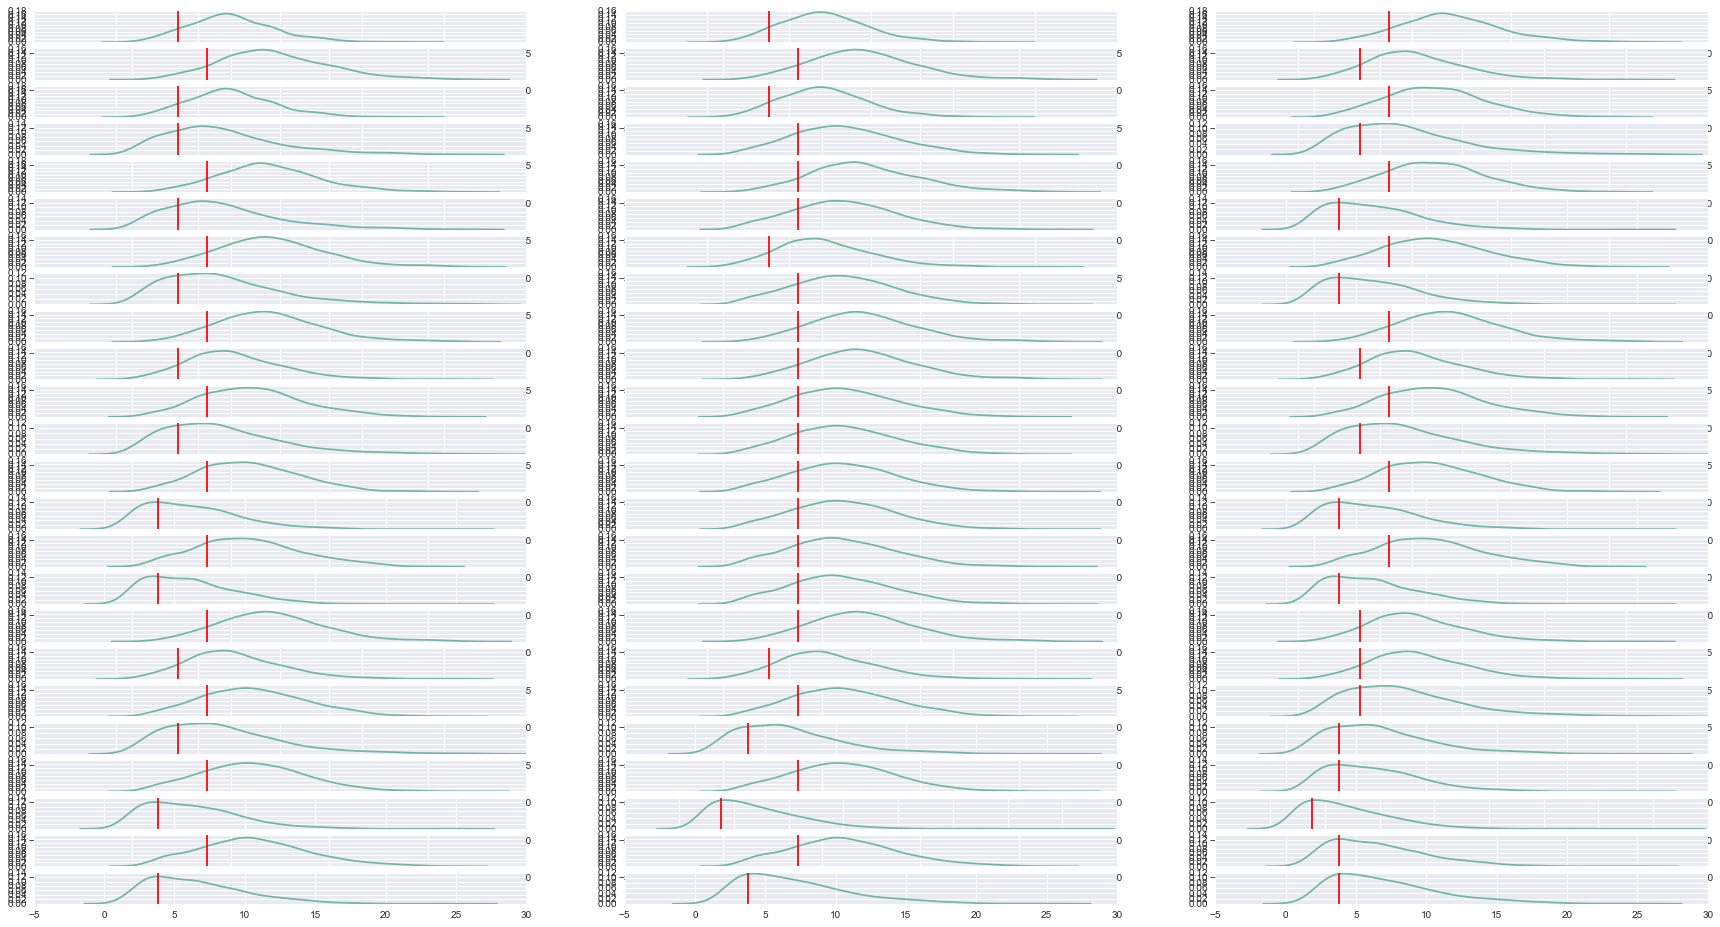

In [6]:
# dataFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/'
NcellsPerDay = [17,11,9,5]
f,axarr = pl.subplots(24,3,figsize = [30,16])
Ct = np.zeros(1000)
Cs = np.zeros(1000)
pltIdx = 0
for kk,comb in enumerate([[1,1,2,3],[1,2,2,3],[1,2,3,3]]):
    for ii,perm in enumerate(it.permutations(NcellsPerDay)):
        #print np.array(item)
        Cdayt = np.zeros(1000)
        Cdays = np.zeros(1000)
        for jj in range(len(NcellsPerDay)):
            #print kk,ii,jj
            fName = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat614Control/dataFiles/subSampling/roRat614Control-D'+str(comb[jj])+'-'+str(perm[jj])+'.npArr'
            #print fName
            C41 = pkl.load(open(fName,'rb'))        
            Cdayt  += C41[:,0]
            Cdays  += C41[:,1]
            Ct  += C41[:,0]
            Cs  += C41[:,1]
        try:
            sns.kdeplot(100.0*Cdays/Cdayt,clip=[0,100],ax=axarr[pltIdx/3,np.mod(pltIdx,3)])
        except ZeroDivisionError:
            print (Cdays-Cs).sum()
        axarr[pltIdx/3,np.mod(pltIdx,3)].axvline(3.8,color = 'r')
        pltIdx+=1
R_s = 100.0*Cs/Ct
totalO += Ct
totalS += Cs
dens614 = sm.nonparametric.KDEUnivariate(R_s)
dens614.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])

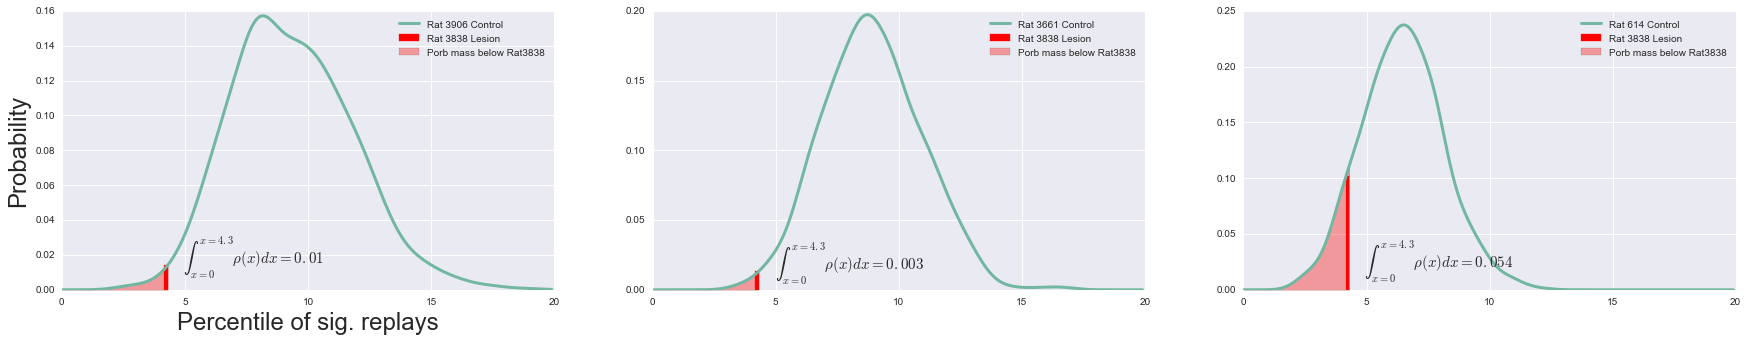

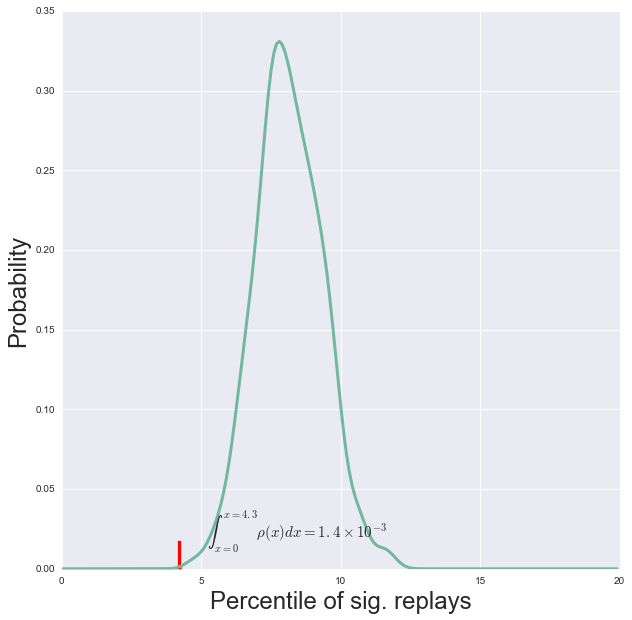

In [7]:
f,ax = pl.subplots(1,3,figsize=[30,5],sharex=True)
x = np.arange(0,20,0.1)
y1 = dens3906.evaluate(np.arange(0,20,0.1))
y2 = dens3661.evaluate(np.arange(0,20,0.1))
y3 = dens614.evaluate(np.arange(0,20,0.1))
ax[0].plot(x,y1,lw=3)
ax[0].axvspan(4.17,4.3,color='r',ymin=0,ymax=dens3906.evaluate(4.3)/dens3906.density.max())
ax[0].fill_between(x, 0, y1,where=x <= 4.3, facecolor='red', alpha=0.35)
ax[0].text(4.92, 0.015, r'$\int_{x=0}^{x=4.3}\rho(x) dx=0.01$', fontsize=15)
ax[1].plot(x,y2,lw=3)
ax[1].axvspan(4.17,4.3,color='r',ymin=0,ymax=dens3661.evaluate(4.3)/dens3661.density.max())
ax[1].fill_between(x, 0, y2,where=x <= 4.3, facecolor='red', alpha=0.35)
ax[1].text(4.95, 0.015, r'$\int_{x=0}^{x=4.3}\rho(x) dx= 0.003$', fontsize=15)
ax[2].plot(x,y3,lw=3)
ax[2].axvspan(4.17,4.28,color='r',ymin=0,ymax=0.87*dens614.evaluate(4.3)/dens614.density.max())
ax[2].fill_between(x, 0, y3,where=x <= 4.3, facecolor='red', alpha=0.35)
ax[2].text(4.9, 0.02, r'$\int_{x=0}^{x=4.3}\rho(x) dx= 0.054$', fontsize=15)
ax[0].set_ylabel('Probability',fontsize=24)
ax[0].set_xlabel('Percentile of sig. replays',fontsize=24)
ax[0].legend(['Rat 3906 Control','Rat 3838 Lesion','Porb mass below Rat3838'])
ax[1].legend(['Rat 3661 Control','Rat 3838 Lesion','Porb mass below Rat3838'])
ax[2].legend(['Rat 614 Control','Rat 3838 Lesion','Porb mass below Rat3838'])
#############################
f,ax= pl.subplots(1,1,figsize=[10,10])
#ax.set_yscale('log')
dens = sm.nonparametric.KDEUnivariate(100.0*totalS/totalO)
dens.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])
x = np.arange(0,20,0.1)
y = dens.evaluate(np.arange(0,20,0.1))
ax.plot(x,y,lw=3)
ax.axvspan(4.17,4.28,color='r',ymin=0,ymax=0.05)#dens.evaluate(3.8)/dens3906.density.max())
ax.fill_between(x, 0, y,where=x <= 4.3, facecolor='red', alpha=0.35)
ax.text(5.2, 0.02, r'$\int_{x=0}^{x=4.3}\rho(x) dx= 1.4\times 10^{-3}$', fontsize=15)
ax.set_ylabel('Probability',fontsize=24)
ax.set_xlabel('Percentile of sig. replays',fontsize=24)

In [8]:
print dens3906.evaluate(np.arange(0,4.3,0.01)).sum()/100
print dens3661.evaluate(np.arange(0,4.3,0.01)).sum()/100
print dens614.evaluate(np.arange(0,4.3,0.01)).sum()/100
print dens.evaluate(np.arange(0,4.3,0.01)).sum()/100

0.0113170296321
0.00825026978279
0.101248605995
0.000334514318839


In [9]:
pkl.dump(100.0*totalS/totalO,open('3838.rrr','wb'),pkl.HIGHEST_PROTOCOL)